In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bar_chart_race as bcr


In [3]:
# Load datasets
url_confirmed = "/Users/jayanthmanthrigalla/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "/Users/jayanthmanthrigalla/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "/Users/jayanthmanthrigalla/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"


In [4]:
confirmed = pd.read_csv(url_confirmed)
deaths = pd.read_csv(url_deaths)
recovered = pd.read_csv(url_recovered)

### Data Cleaning

In [5]:
confirmed.isna().sum()
deaths.isna().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [6]:
recovered.isna().sum()

Province/State    199
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [7]:
#Raw Data
confirmed.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


### Data Dimenionality

In [8]:
confirmed = confirmed.drop(columns=["Province/State", "Lat", "Long"])
deaths= deaths.drop(columns=["Province/State", "Lat", "Long"])
recovered = recovered.drop(columns=["Province/State", "Lat", "Long"])


In [9]:
# Group by country and sum all the date columns
confirmed = confirmed.groupby("Country/Region").sum().reset_index()
deaths= deaths.groupby("Country/Region").sum().reset_index()
recovered = recovered.groupby("Country/Region").sum().reset_index()

In [10]:
#Turns columns into rows - Date
confirmed_long = confirmed.melt(id_vars=[ "Country/Region"], var_name="Date", value_name="Confirmed")
deaths_long = deaths.melt(id_vars=["Country/Region"], var_name="Date", value_name="Deaths")
recovered_long = recovered.melt(id_vars=["Country/Region"], var_name="Date", value_name="Recovered")

In [11]:
#Show
confirmed_long.head()

,Country/Region,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [44]:
confirmed_long.head()

,Country/Region,Date,Confirmed,Month
0,Afghanistan,2020-01-22,0,2020-01
1,Albania,2020-01-22,0,2020-01
2,Algeria,2020-01-22,0,2020-01
3,Andorra,2020-01-22,0,2020-01
4,Angola,2020-01-22,0,2020-01


In [13]:
# Convert 'Date' to datetime format
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'])

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1523984407.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1523984407.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])
/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1523984407.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_long['Date'] = pd.to_datetime(recovered_long['Date'])


In [49]:
confirmed_long.head(30)

,Country/Region,Date,Confirmed,Month
0,Afghanistan,2020-01-22,0,2020-01
1,Albania,2020-01-22,0,2020-01
2,Algeria,2020-01-22,0,2020-01
3,Andorra,2020-01-22,0,2020-01
4,Angola,2020-01-22,0,2020-01
5,Antarctica,2020-01-22,0,2020-01
6,Antigua and Barbuda,2020-01-22,0,2020-01
7,Argentina,2020-01-22,0,2020-01
8,Armenia,2020-01-22,0,2020-01
9,Australia,2020-01-22,0,2020-01


In [ ]:
#Save
confirmed_long.to_csv("/Users/jayanthmanthrigalla/Downloads/confirmed_long_cleaned.csv", index=False)
recovered_long.to_csv("/Users/jayanthmanthrigalla/Downloads/recovered_long_cleaned.csv", index=False)
deaths_long.to_csv("/Users/jayanthmanthrigalla/Downloads/death_long_cleaned.csv", index=False)

### Global trend of Confirmed cases

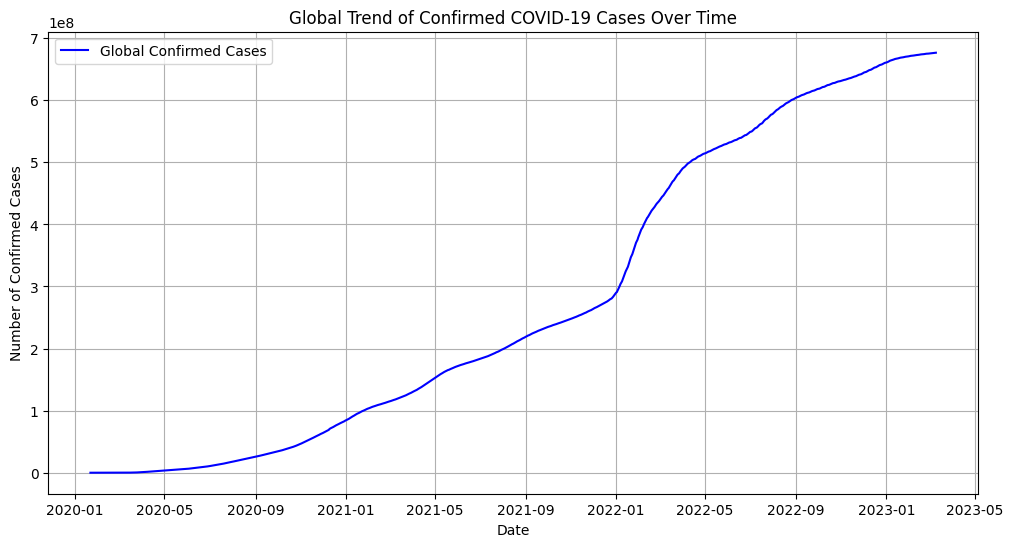

In [15]:
# Global trend of confirmed cases over time
global_trend = confirmed_long.groupby('Date')['Confirmed'].sum()

plt.figure(figsize=(12, 6))
plt.plot(global_trend.index, global_trend.values, label='Global Confirmed Cases', color='blue')
plt.title('Global Trend of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

### Top 10 Countries of Confirmed cases

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/546998399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


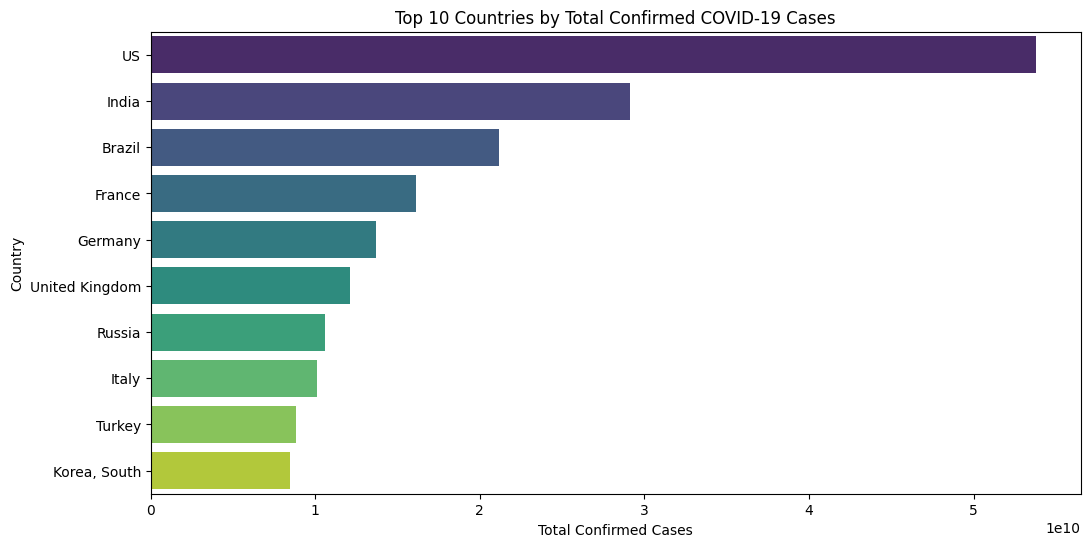

In [16]:
# Top 10 countries by total confirmed cases
top_countries = confirmed_long.groupby('Country/Region')['Confirmed'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

In [17]:

# Assume confirmed_long has columns: 'Country/Region', 'Date', 'Confirmed'
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
confirmed_long['Month'] = confirmed_long['Date'].dt.to_period('M')

# Get the last cumulative value for each country each month
monthly_cases = confirmed_long.sort_values('Date').groupby(['Country/Region', 'Month'])['Confirmed'].last().reset_index()


In [18]:
pivot_df = monthly_cases.pivot(index='Month', columns='Country/Region', values='Confirmed').fillna(0)

# After pivoting
pivot_df = monthly_cases.pivot(index='Month', columns='Country/Region', values='Confirmed').fillna(0)

# Convert the index explicitly to datetime
pivot_df.index = pd.to_datetime(pivot_df.index.astype(str))


### Confirmed Cases GIF

In [19]:

bcr.bar_chart_race(
    df=pivot_df,
    n_bars=10,
    filter_column_colors=True,
    title='Top 10 Countries by Total Confirmed COVID-19 Cases (Monthly)',
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center', 'size': 18},
    period_fmt='%B %Y',
    steps_per_period=20,
    period_length=1200,
    figsize=(12, 7),
    dpi=150,
    filename="confirmed_monthly.gif"
)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Library/Frameworks/Python.framework/Versions/3.12

### Global Trend of Death Cases

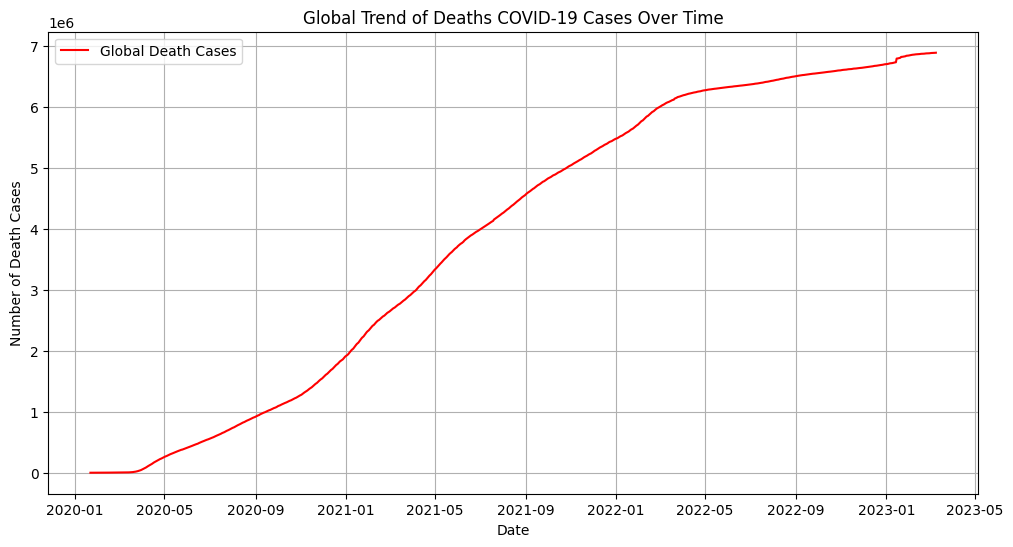

In [20]:
# Global trend of death cases over time
global_trend_2 = deaths_long.groupby('Date')['Deaths'].sum()

plt.figure(figsize=(12, 6))
plt.plot(global_trend_2.index, global_trend_2.values, label='Global Death Cases', color='red')
plt.title('Global Trend of Deaths COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Death Cases')
plt.legend()
plt.grid(True)
plt.show()

### Top 10 Countires of Death Cases

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1453437792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_2.values, y=top_countries_2.index, palette='viridis')


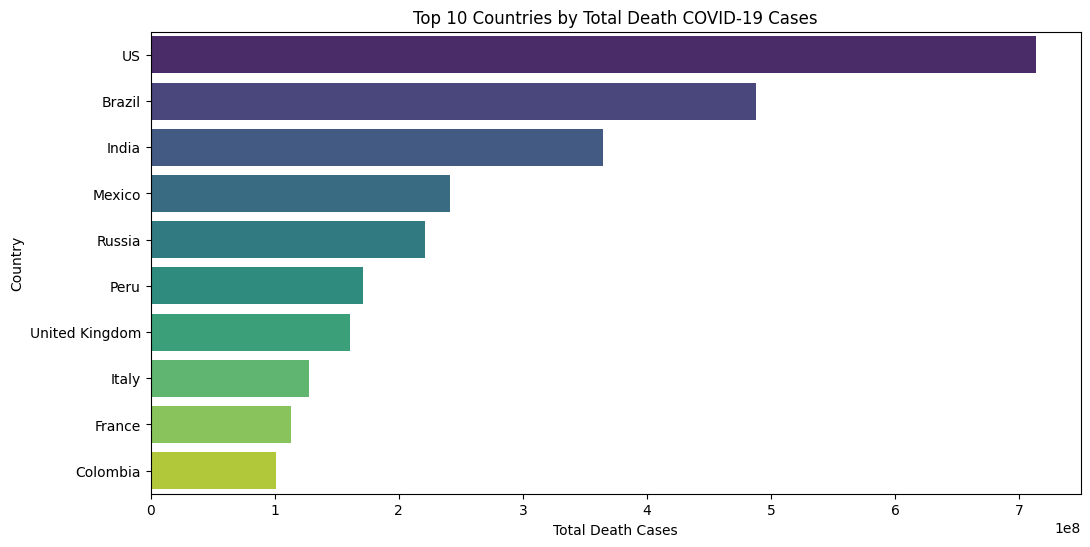

In [21]:
# Top 10 countries by total death cases
top_countries_2 = deaths_long.groupby('Country/Region')['Deaths'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_2.values, y=top_countries_2.index, palette='viridis')
plt.title('Top 10 Countries by Total Death COVID-19 Cases')
plt.xlabel('Total Death Cases')
plt.ylabel('Country')
plt.show()

In [22]:

# Assume confirmed_long has columns: 'Country/Region', 'Date', 'Confirmed'
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])
deaths_long['Month'] = deaths_long['Date'].dt.to_period('M')

# Get the last cumulative value for each country each month
monthly_cases = deaths_long.sort_values('Date').groupby(['Country/Region', 'Month'])['Deaths'].last().reset_index()


In [23]:
pivot_df = monthly_cases.pivot(index='Month', columns='Country/Region', values='Deaths').fillna(0)

# After pivoting
pivot_df = monthly_cases.pivot(index='Month', columns='Country/Region', values='Deaths').fillna(0)

# Convert the index explicitly to datetime
pivot_df.index = pd.to_datetime(pivot_df.index.astype(str))



### Deaths GIF

In [24]:
bcr.bar_chart_race(
    df=pivot_df,
    n_bars=10,
    filter_column_colors=True,
    title='Top 10 Countries by Total Death COVID-19 Cases (Monthly)',
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center', 'size': 18},
    period_fmt='%B %Y',
    steps_per_period=20,
    period_length=1200,
    figsize=(12, 7),
    dpi=150,
    filename="deaths_monthly.gif"
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Library/Frameworks/Python.framework/Versions/3.12

### Global Trend of Recovered Cases

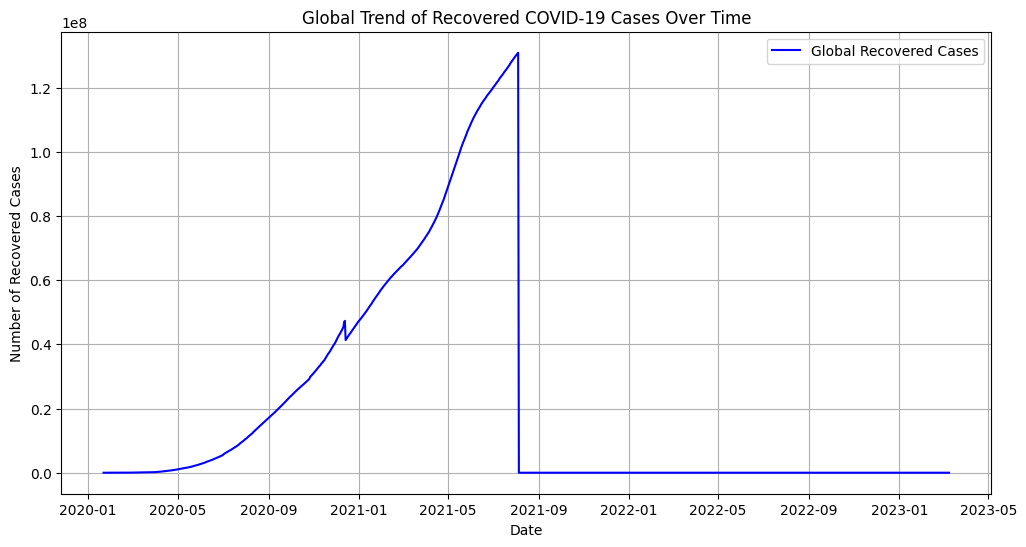

In [25]:
# Global trend of recovered cases over time
global_trend_3 = recovered_long.groupby('Date')['Recovered'].sum()

plt.figure(figsize=(12, 6))
plt.plot(global_trend_3.index, global_trend_3.values, label='Global Recovered Cases', color='blue')
plt.title('Global Trend of Recovered COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recovered Cases')
plt.legend()
plt.grid(True)
plt.show()

### Top 10 Countries of Recovered Cases

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/301151457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_3.values, y=top_countries_3.index, palette='viridis')


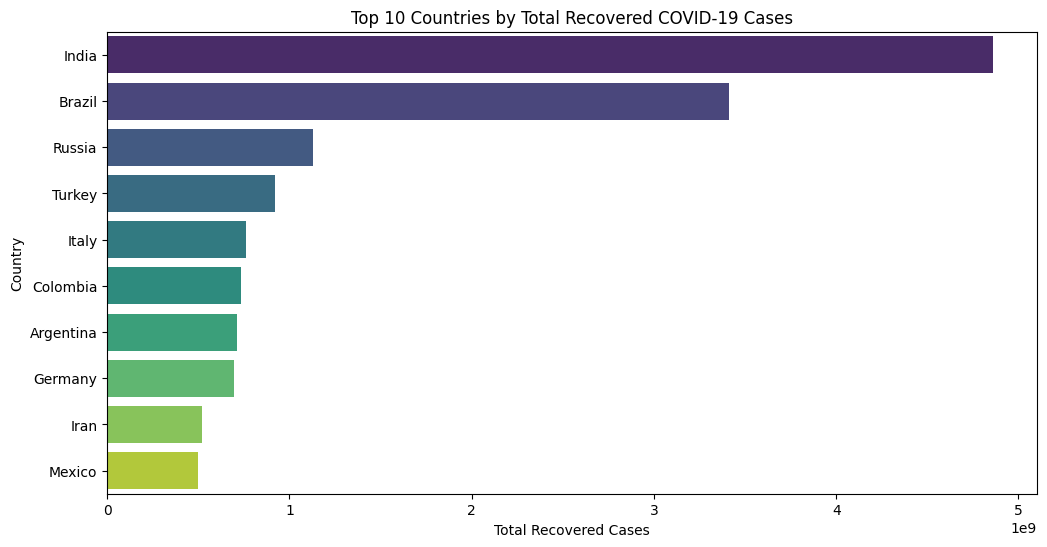

In [26]:
# Top 10 countries by total recovered cases
top_countries_3 = recovered_long.groupby('Country/Region')['Recovered'].sum().nlargest(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_3.values, y=top_countries_3.index, palette='viridis')
plt.title('Top 10 Countries by Total Recovered COVID-19 Cases')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Country')
plt.show()

In [27]:
unique_countries = confirmed_long["Country/Region"].unique()
print(unique_countries)
print(confirmed_long['Date'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica

### Data Merege

In [28]:
# Merge confirmed and deaths
merged_df = confirmed_long.merge(deaths_long,on=["Country/Region", "Date"])

# Merge the result with recovered
merged_df = merged_df.merge(recovered_long,on=["Country/Region", "Date"])


In [29]:
unique_countries = merged_df["Country/Region"].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica

### Active Cases

In [30]:
merged_df["Active"] = merged_df["Confirmed"] - merged_df["Deaths"] - merged_df["Recovered"]

In [31]:
country_daily = merged_df.groupby(["Country/Region", "Date"])[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

### New Daily Cases

In [32]:
# First, make sure your data is sorted
country_daily = country_daily.sort_values(by=["Country/Region", "Date"])

# Then calculate new daily cases
country_daily["NewConfirmed"] = country_daily.groupby("Country/Region")["Confirmed"].diff().fillna(0).astype(int)
country_daily["NewDeaths"] = country_daily.groupby("Country/Region")["Deaths"].diff().fillna(0).astype(int)
country_daily["NewRecovered"] = country_daily.groupby("Country/Region")["Recovered"].diff().fillna(0).astype(int)


### Summary Statistics

In [74]:

# Filter for a specific country
country = "India"
df = country_daily[country_daily["Country/Region"] == country].copy()
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)

# Total values
total_confirmed = df["Confirmed"].iloc[-1]
total_deaths = df["Deaths"].iloc[-1]
total_recovered = df["Recovered"].iloc[-1]

# Daily case stats
mean_daily = df["NewConfirmed"].mean()
median_daily = df["NewConfirmed"].median()
min_daily = df[df["NewConfirmed"] > 0]["NewConfirmed"].min()  # Exclude zero/neg
max_daily = df["NewConfirmed"].max()
std_dev = df["NewConfirmed"].std()

# Growth rate
initial = df["Confirmed"].iloc[0]
growth_rate = ((total_confirmed - initial) / initial) * 100 if initial > 0 else np.nan

# Peak day and value
peak_date = df.loc[df["NewConfirmed"].idxmax(), "Date"]
peak_value = df["NewConfirmed"].max()

# Days since first case
first_case_date = df[df["Confirmed"] > 0]["Date"].min()
days_since_first = (df["Date"].max() - first_case_date).days

# Rates
cfr = (total_deaths / total_confirmed) * 100 if total_confirmed > 0 else np.nan
recovery_rate = (total_recovered / total_confirmed) * 100 if total_confirmed > 0 else np.nan

# Missing & zero-day stats
missing = df["NewConfirmed"].isna().sum()
zero_days = (df["NewConfirmed"] == 0).sum()

# Summary dictionary
summary_stats = {
    "Total Confirmed": total_confirmed,
    "Total Deaths": total_deaths,
    "Total Recovered": total_recovered,
    "Mean Daily Cases": mean_daily,
    "Median Daily Cases": median_daily,
    "Min Daily Cases (Excl. 0/neg)": min_daily,
    "Max Daily Cases": max_daily,
    "Standard Deviation": std_dev,
    "Growth Rate (%)": growth_rate,
    "Peak Date": peak_date.date(),
    "Peak Value": peak_value,
    "Days Since First Case": days_since_first,
    "Case Fatality Rate (%)": cfr,
    "Recovery Rate (%)": recovery_rate,
    "Missing Values Count": missing,
    "Zero-report Days": zero_days
}

# Convert to DataFrame and display
summary_df = pd.DataFrame([summary_stats])
print(summary_df.T)


                                          0
Total Confirmed                    44690738
Total Deaths                         530779
Total Recovered                           0
Mean Daily Cases               39099.508311
Median Daily Cases                  13615.0
Min Daily Cases (Excl. 0/neg)             1
Max Daily Cases                      414188
Standard Deviation             71632.400991
Growth Rate (%)                         NaN
Peak Date                        2021-05-06
Peak Value                           414188
Days Since First Case                  1134
Case Fatality Rate (%)             1.187671
Recovery Rate (%)                       0.0
Missing Values Count                      0
Zero-report Days                         47


### Proximity Analysis

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Pivot the data: rows = countries, columns = dates, values = New cases
pivot_df = country_daily.pivot(index="Country/Region", columns="Date", values="NewConfirmed").fillna(0)

# Step 2: Compute cosine similarity between country vectors
similarity_matrix = cosine_similarity(pivot_df)

# Step 3: Convert to readable DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=pivot_df.index, columns=pivot_df.index)

# Example: Top 5 countries most similar to Canada
top_similar_Countries = similarity_df["India"].sort_values(ascending=False).head(6)[1:]
print("Countries with trends(Confirmed) most similar to India:\n\n", top_similar_Countries)


Countries with trends(Confirmed) most similar to India:

 Country/Region
Nepal        0.862348
Colombia     0.736434
Argentina    0.697679
Kuwait       0.695482
Maldives     0.691397
Name: India, dtype: float64


In [65]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Pivot the data: rows = countries, columns = dates, values = New cases
pivot_df_2 = country_daily.pivot(index="Country/Region", columns="Date", values="NewDeaths").fillna(0)

# Step 2: Compute cosine similarity between country vectors
similarity_matrix_2 = cosine_similarity(pivot_df_2)

# Step 3: Convert to readable DataFrame
similarity_df_2 = pd.DataFrame(similarity_matrix_2, index=pivot_df_2.index, columns=pivot_df_2.index)

# Example: Top 5 countries most similar to Canada
top_similar_Countries_2 = similarity_df_2["India"].sort_values(ascending=False).head(6)[1:]
print("Countries with trends(Deaths) most similar to India:\n\n", top_similar_Countries_2)

Countries with trends(Deaths) most similar to India:

 Country/Region
Uruguay      0.796098
Colombia     0.787490
Paraguay     0.772556
Bahrain      0.742610
Argentina    0.714287
Name: India, dtype: float64


In [66]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Pivot the data: rows = countries, columns = dates, values = New cases
pivot_df_3 = country_daily.pivot(index="Country/Region", columns="Date", values="NewRecovered").fillna(0)

# Step 2: Compute cosine similarity between country vectors
similarity_matrix_3 = cosine_similarity(pivot_df_3)

# Step 3: Convert to readable DataFrame
similarity_df_3 = pd.DataFrame(similarity_matrix_3, index=pivot_df_3.index, columns=pivot_df_3.index)

# Example: Top 5 countries most similar to Canada
top_similar_Countries_3 = similarity_df_3["India"].sort_values(ascending=False).head(6)[1:]
print("Countries with trends(Recovered) most similar to India:\n\n", top_similar_Countries_3)

Countries with trends(Recovered) most similar to India:

 Country/Region
Cabo Verde    0.999384
Argentina     0.999019
Bahrain       0.998997
Paraguay      0.998810
Iran          0.998801
Name: India, dtype: float64


### Entropy

In [ ]:
from scipy.stats import entropy

# Step 1: Function to compute entropy of a series
def compute_entropy(series):
    prob_dist = series / series.sum()
    return entropy(prob_dist, base=2)

# Step 2: Apply per country
entropy_values = (
    country_daily.groupby("Country/Region")["NewConfirmed"]
    .apply(lambda x: compute_entropy(x.fillna(0)))
    .reset_index(name="Entropy")
)

# Step 3: Sort and view top 10 unpredictable countries
entropy_values = entropy_values.sort_values(by="Entropy", ascending=False)
print("Top 10 countries with highest entropy (most unpredictable spread):")
print(entropy_values.head(10))


Top 10 countries with highest entropy (most unpredictable spread):
           Country/Region   Entropy
189  United Arab Emirates  9.494400
36                  Chile  9.364188
145                 Qatar  9.362276
147                Russia  9.338845
71              Guatemala  9.330336
192            Uzbekistan  9.211484
122            Montenegro  9.192111
82                   Iran  9.176597
136              Pakistan  9.172466
194             Venezuela  9.166391


### Active Cases on 08/04/2021 Around the Globe

In [35]:
# Set cutoff date
cutoff_date = pd.to_datetime("2021-08-04")

# Filter the data to only up to the cutoff date
filtered = country_daily[country_daily["Date"] <= cutoff_date]

# Sort so the latest dates are last
filtered = filtered.sort_values(["Country/Region", "Date"])

# Step 1: Get the latest confirmed & deaths (standard)
latest_confirmed_deaths = filtered.groupby("Country/Region").tail(1)[["Country/Region", "Date", "Confirmed", "Deaths"]]

# Step 2: Get the latest non-zero Recovered per country
non_zero_recovered = filtered[filtered["Recovered"] > 0]
latest_recovered = non_zero_recovered.groupby("Country/Region").tail(1)[["Country/Region", "Recovered"]]

# Step 3: Merge recovered (non-zero latest) with the confirmed+deaths
final_stats = latest_confirmed_deaths.merge(latest_recovered, on="Country/Region", how="left")

# Step 4: Fill NaN recovered with 0 if no non-zero recovered was found
final_stats["Recovered"] = final_stats["Recovered"].fillna(0).astype(int)

# Step 5: Compute Active cases
final_stats["Active"] = final_stats["Confirmed"] - final_stats["Deaths"] - final_stats["Recovered"]

# Optional: sort and view
final_stats = final_stats.sort_values(by="Confirmed", ascending=False)
print(final_stats.to_string(index=False))

                  Country/Region       Date  Confirmed  Deaths  Recovered   Active
                              US 2021-08-04   35460776  611222    6298082 28551472
                           India 2021-08-04   31812114  426290   30974748   411076
                          Brazil 2021-08-04   20034407  559944   17771228  1703235
                          Russia 2021-08-04    6274006  159032    5609682   505292
                          France 2021-08-04    6272466  112245     415111  5745110
                  United Kingdom 2021-08-04    5980830  157209      24693  5798928
                          Turkey 2021-08-04    5822487   51767    5478185   292535
                       Argentina 2021-08-04    4975616  106747    4615834   253035
                        Colombia 2021-08-04    4815063  121695    4615354    78014
                           Spain 2021-08-04    4545184   81844     150376  4312964
                           Italy 2021-08-04    4369964  128136    4144608    97220
    

In [52]:
entropy_values_2 = (
    final_stats.groupby("Country/Region")["Confirmed"]
    .apply(lambda x: compute_entropy(x.fillna(0)))
    .reset_index(name="Entropy")
)

# Step 3: Sort and view top 10 unpredictable countries
entropy_values_2 = entropy_values_2.sort_values(by="Entropy", ascending=False)
print("Top 10 countries with highest entropy (most unpredictable spread):")
print(entropy_values_2.head(10))

Top 10 countries with highest entropy (most unpredictable spread):
            Country/Region  Entropy
0              Afghanistan      0.0
149  Saint Kitts and Nevis      0.0
125                Namibia      0.0
127                  Nepal      0.0
128            Netherlands      0.0
129            New Zealand      0.0
130              Nicaragua      0.0
131                  Niger      0.0
132                Nigeria      0.0
133        North Macedonia      0.0


### Top 10 Countires on Active cases

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/2096867853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


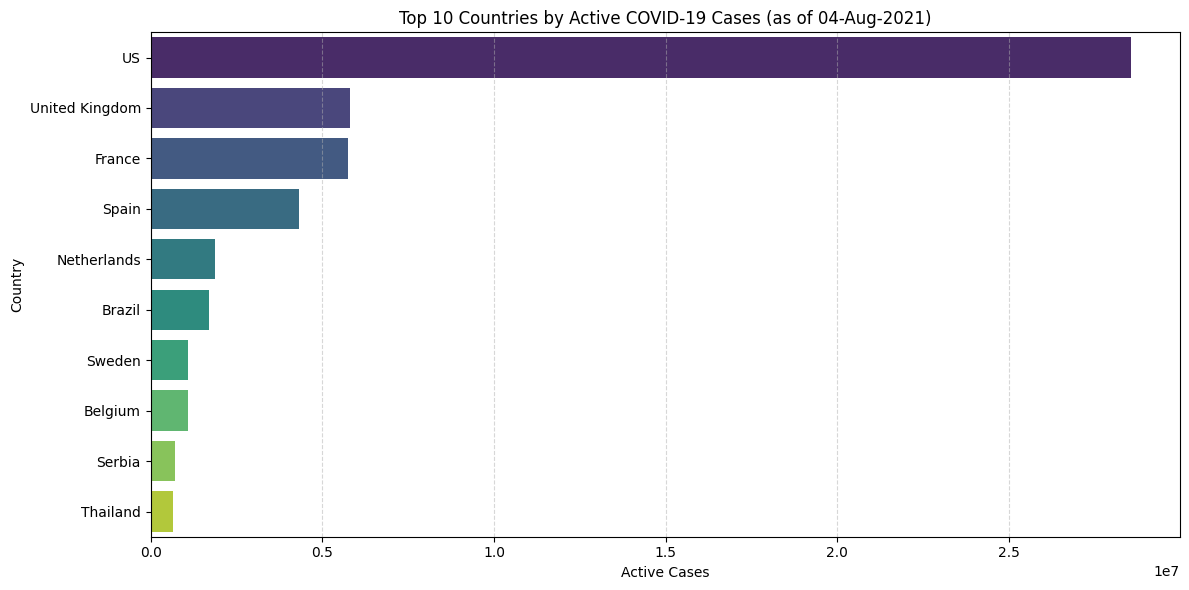

In [36]:
# Optional: limit to top N countries by active cases
top_n = 10
plot_data = final_stats.sort_values(by="Active", ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=plot_data["Active"],
    y=plot_data["Country/Region"],
    palette='viridis'
)
plt.title("Top 10 Countries by Active COVID-19 Cases (as of 04-Aug-2021)")
plt.xlabel("Active Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# -----------------------------
# LOAD YOUR DATA
# -----------------------------
# Data must contain: ['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']
# Make sure your data is already loaded into `country_daily`
country_daily['Date'] = pd.to_datetime(country_daily['Date'])

# -----------------------------
# DASH APP SETUP
# -----------------------------
app = dash.Dash(__name__, external_stylesheets=[
    "https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css"
])
app.title = "COVID-19 Dashboard"

case_options = ['Confirmed', 'Deaths', 'Recovered']

# -----------------------------
# LAYOUT
# -----------------------------
app.layout = html.Div([
    html.H1("🌍 COVID-19 Global Dashboard", style={'textAlign': 'center', 'marginTop': '20px'}),

    html.Div([
        html.Div([
            html.Label("Select Case Type:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='case-type',
                options=[{'label': c, 'value': c} for c in case_options],
                value='Confirmed',
                clearable=False
            )
        ], className='col-md-6'),

        html.Div([
            html.Label("Select Date:", style={'fontWeight': 'bold'}),
            dcc.DatePickerSingle(
                id='date-picker',
                min_date_allowed=country_daily['Date'].min(),
                max_date_allowed=country_daily['Date'].max(),
                date=country_daily['Date'].max(),
                display_format='YYYY-MM-DD'
            )
        ], className='col-md-6')
    ], className='row px-5'),

    html.Br(),

    html.Div([
        dcc.Graph(id="covid-map", style={'height': '80vh'})
    ], className='container-fluid'),
    
    html.Br(),
    
    html.Div([
    html.H4("📈 Monthly Confirmed and Death Trends", style={
        'textAlign': 'center',
        'marginTop': '40px',
        'fontSize': '24px'
    }),

    html.Div([
        html.Div([
            html.Img(
                src='/assets/confirmed_monthly.gif',
                style={'width': '80%', 'margin': '0 auto', 'display': 'block'}
            ),
            html.P("Confirmed Cases Over Time", style={
                'textAlign': 'center',
                'fontWeight': 'bold',
                'fontSize': '18px'
            })
        ], style={'marginBottom': '50px'}),

        html.Div([
            html.Img(
                src='/assets/deaths_monthly.gif',
                style={'width': '80%', 'margin': '0 auto', 'display': 'block'}
            ),
            html.P("Deaths Over Time", style={
                'textAlign': 'center',
                'fontWeight': 'bold',
                'fontSize': '18px'
            })
        ])
    ], className='container')
])
])


# -----------------------------
# CALLBACK
# -----------------------------
@app.callback(
    Output('covid-map', 'figure'),
    Input('case-type', 'value'),
    Input('date-picker', 'date')
)
def update_map(selected_case, selected_date):
    if selected_date is None:
        selected_date = country_daily["Date"].max()

    selected_date = pd.to_datetime(selected_date)
    df_filtered = country_daily[country_daily["Date"] == selected_date]

    if df_filtered.empty:
        fig = px.scatter_geo()
        fig.update_layout(
            title="No data available for selected date",
            geo=dict(showframe=False, showcoastlines=True)
        )
        return fig

    # 👇 Create smaller bubbles for better visibility
    df_filtered["BubbleSize"] = df_filtered[selected_case] ** 0.4

    # 👇 Assign color scale based on selected case type
    color_map = {
        "Confirmed": ['skyblue','Navy'],
        "Deaths": ['orange', 'darkred'],
        "Recovered": ['lightgreen', 'darkgreen']
    }
  
    # 👇 Plot the map
    fig = px.scatter_geo(
    df_filtered,
    locations="Country/Region",
    locationmode="country names",
    size="BubbleSize",
    color=selected_case,
    hover_name="Country/Region",
    hover_data={
        "Date": True,
        f"New{selected_case}": True,  # Confirmed, # new daily cases
        selected_case:True,
        "Country/Region": False,  
        "BubbleSize": False,
        "Date": False 
    },
    projection="natural earth",
    title=f"{selected_case} Cases on {selected_date.date()}",
    template="plotly_white",
    size_max=30,
    color_continuous_scale=color_map[selected_case]
)


    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True),
        coloraxis_colorbar=dict(title=selected_case)
    )

    return fig


    
import webbrowser
import threading

def open_browser():
    webbrowser.open_new("http://127.0.0.1:8050/")

if __name__ == '__main__':
    threading.Timer(1.0, open_browser).start()
    app.run(debug=True)

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1305760439.py:120: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1305760439.py:120: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p6/bs_y3xtn0mdc96blxc86b9b40000gn/T/ipykernel_44522/1305760439.py:120: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in